In [1]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from desitarget.mock.mockmaker import QSOMaker
qq = QSOMaker()

In [3]:
qdata = qq.read()

INFO:mockmaker.py:633:readmock: Reading the whole DESI footprint with nside = 16!
INFO:mockmaker.py:644:readmock: Reading /Users/ioannis/work/desi/mocks/GaussianRandomField/v0.0.7_2LPT/QSO.fits
INFO:mockmaker.py:650:readmock: Assigning healpix pixels with nside = 16.
INFO:mockmaker.py:662:readmock: Trimmed to 3739643 QSOs in 1269 healpixel(s).


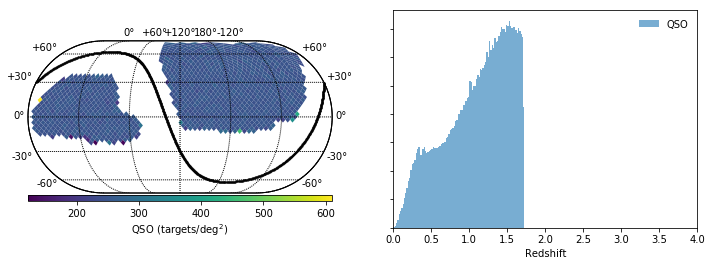

In [4]:
qq.qamock_sky(qdata)

In [5]:
qdata.keys()

dict_keys(['RA', 'BRICKNAME', 'NSIDE', 'HEALPIX', 'WEIGHT', 'MOCKFORMAT', 'DEC', 'Z', 'MOCKID', 'TARGET_NAME'])

In [6]:
area = hp.nside2pixarea(qdata['NSIDE'], degrees=True)
print(area)

13.4286983234


In [7]:
tt = []
for hh in set(qdata['HEALPIX']):
    these = np.in1d(qdata['HEALPIX'], hh)
    tt.append(np.sum(qdata['WEIGHT'][these]) / area)
tt = np.array(tt)

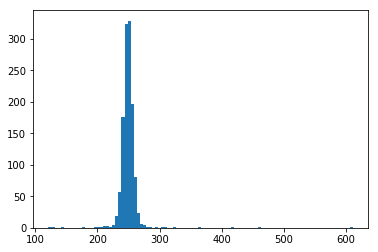

In [8]:
_ = plt.hist(tt, bins=100)

In [9]:
print(np.mean(tt), np.median(tt))

249.438739471 249.018923463
